 # Ï†ÑÌÜµÏ†Å ÏãúÍ≥ÑÏó¥ Î™®Îç∏ÎßÅ

# 1.ÌôòÍ≤ΩÏ§ÄÎπÑ

## (1) ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

## (2) Ìï®Ïàò ÏÉùÏÑ± 

* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [2]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

* ÏûîÏ∞®Î∂ÑÏÑù

In [3]:
def residual_diag(residuals, lags = 30) :
    print('* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

## (3) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [4]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path, usecols = ['date', 'sales'])
data = data.loc[data['date']<= '2014-10-31'].reset_index(drop = True)
data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.day_name().str.slice(0,3)
data.head()

date  sales weekday
0 2013-01-01     45     Tue
1 2013-01-02     53     Wed
2 2013-01-03     65     Thu
3 2013-01-04     66     Fri
4 2013-01-05     97     Sat

* Î≥ÄÏàò ÏÑ§Î™Ö

    * date : ÎÇ†Ïßú
    * sales : ÌåêÎß§Îüâ
    * weekday : ÏöîÏùº

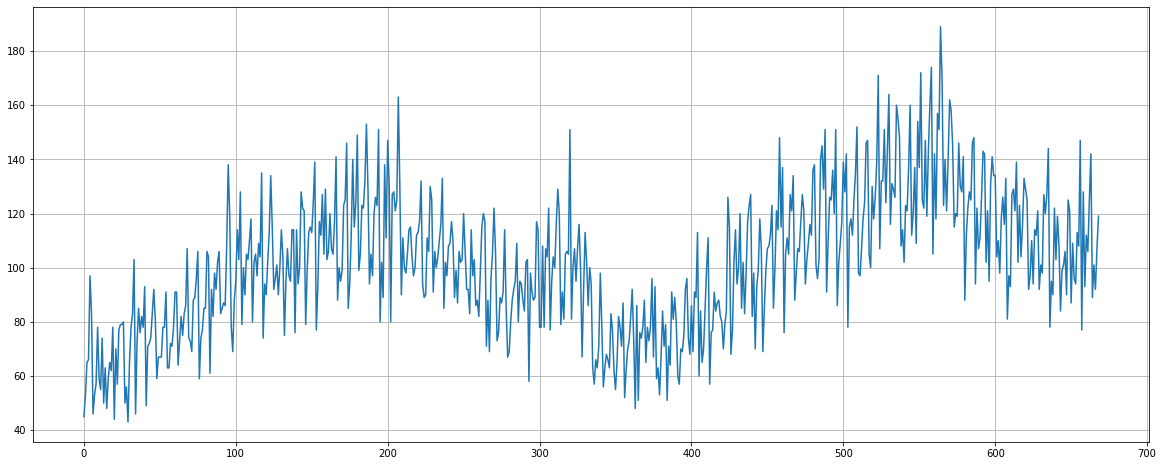

In [5]:
plt.figure(figsize = (20,8))
plt.plot(data['sales'])
plt.grid()
plt.show()

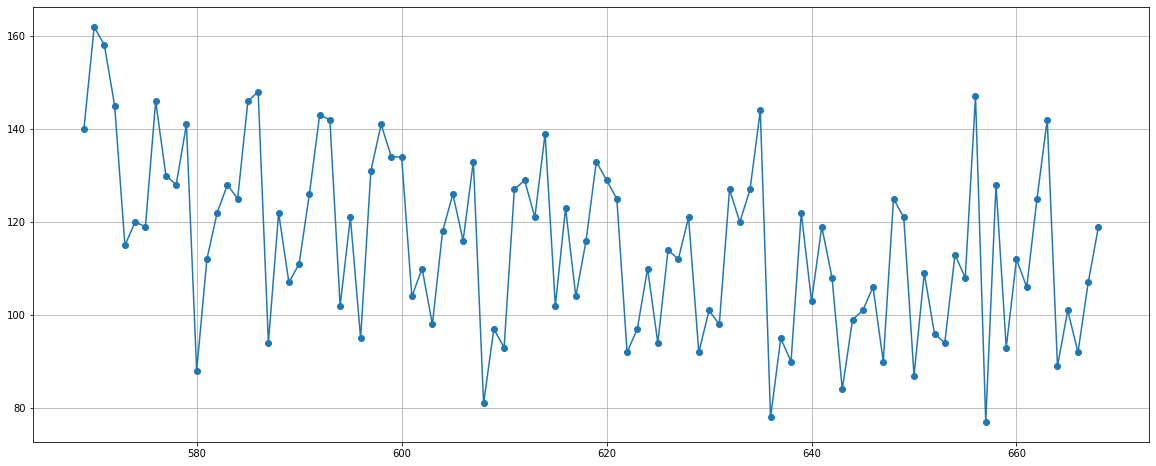

In [6]:
temp = data[-100:]
plt.figure(figsize = (20,8))
plt.plot(temp['sales'], marker ='o')
plt.grid()
plt.show()

# 2.Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨

## (1) y ÎßåÎì§Í∏∞

* ÏÇ¨Ï†Ñ Í¥ÄÏ∞∞(look-ahead) : ÎØ∏ÎûòÏùò Ïñ¥Îñ§ ÏÇ¨Ïã§ÏùÑ ÏïàÎã§Îäî Îúª
* ÏÇ¨Ï†Ñ Í¥ÄÏ∞∞ Î¨∏Ï†ú : 
    * Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ Ïã§Ï†úÎ°ú ÏïåÏïÑÏïº ÌïòÎäî ÏãúÏ†êÎ≥¥Îã§ Îçî ÏùºÏ∞ç ÎØ∏ÎûòÏóê ÎåÄÌïú ÏÇ¨Ïã§ÏùÑ ÏïåÍ≤å ÎêòÎäî Î¨∏Ï†ú.  
    * ÏÇ¨Ï†ÑÍ¥ÄÏ∞∞ Î¨∏Ï†úÍ∞Ä ÏûàÎäî Ï±ÑÎ°ú Î™®Îç∏ÎßÅÏùÑ ÌïòÍ≤å ÎêòÎ©¥, ÎÜÄÎùºÏö¥ ÏÑ±Îä•Ïùò Î™®Îç∏Ïù¥ ÎßåÎì§Ïñ¥Ïßê. --> Í∑∏Îü¨ÎÇò Ïã§Ï†úÎ°úÎäî Î∂àÍ∞ÄÎä•Ìïú ÏÉÅÌô©.

* Í∑∏ÎûòÏÑú yÎ•º ÎßåÎì§Îïå ÏÇ¨Ï†ÑÍ¥ÄÏ∞∞Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï¥Ïïº Ìï®.
    * ÏòàÏ†úÎäî 1Ïùº ÌõÑÏùò ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÎ†§Í≥† Ìï©ÎãàÎã§.

* 1Ïùº ÌõÑ ÏàòÏöîÎüâÏùÑ ÏòàÏ∏°ÌïòÎ†§Î©¥, yÎ•º Ïñ¥ÎñªÍ≤å ÎßåÎì§Ïñ¥Ïïº Ìï†ÍπåÏöî?

In [7]:
data['y'] = data['sales'].shift(-1)
display(data.head())
display(data.tail())

date  sales weekday     y
0 2013-01-01     45     Tue  53.0
1 2013-01-02     53     Wed  65.0
2 2013-01-03     65     Thu  66.0
3 2013-01-04     66     Fri  97.0
4 2013-01-05     97     Sat  83.0

date  sales weekday      y
664 2014-10-27     89     Mon  101.0
665 2014-10-28    101     Tue   92.0
666 2014-10-29     92     Wed  107.0
667 2014-10-30    107     Thu  119.0
668 2014-10-31    119     Fri    NaN

In [8]:
# Ï†úÏùº ÎßàÏßÄÎßâ ÌñâÏùÄ ÏÇ≠Ï†ú
data.dropna(axis = 0, inplace = True)
data.tail()

date  sales weekday      y
663 2014-10-26    142     Sun   89.0
664 2014-10-27     89     Mon  101.0
665 2014-10-28    101     Tue   92.0
666 2014-10-29     92     Wed  107.0
667 2014-10-30    107     Thu  119.0

## (2) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

### 1) x, y ÎÇòÎàÑÍ∏∞

In [9]:
target = 'y'

x = data.drop([target, 'date'], axis = 1) #Ï†úÍ±∞Ìï† Îïå, dateÎèÑ Ï†úÍ±∞
y = data.loc[:, target]

### 2) train, val Î∂ÑÌï†
* 1Ìöå Î∂ÑÌï† : train_test_split( x, y, test_size= , shuffle = False) 
    * test_size : ÏÜåÏàò - ÎπÑÏú®, ÏûêÏó∞Ïàò - Í∞ØÏàò
    * shuffle = False : ÏÑûÏßÄ ÎßêÍ≥† Îç∞Ïù¥ÌÑ∞ ÎÅùÏóêÏÑú test_size ÎßåÌÅº ÏûêÎ•¥Í∏∞
* k-fold cross validation for Time Seires : TimeSeriesSplit

In [10]:
# Ïó¨Í∏∞ÏÑúÎäî 1Ìöå Î∂ÑÌï†Î°ú ÏßÑÌñâÌï©ÎãàÎã§.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 30, shuffle = False)

# 3.Î™®Îç∏ÎßÅ1 : ARIMA

## (1) y Í∞í ÏÇ¥Ìé¥Î≥¥Í∏∞

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00852
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.27897
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


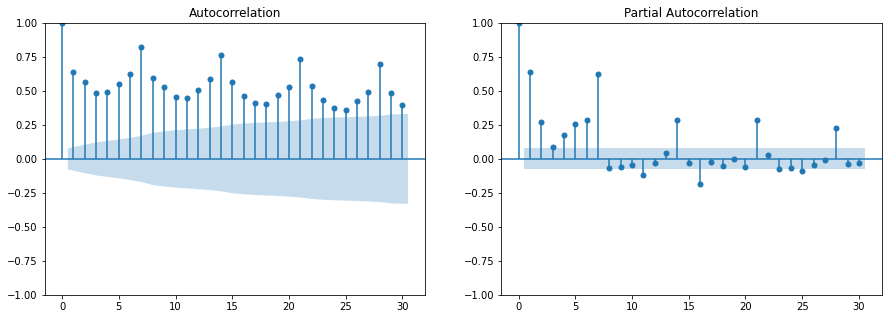

In [11]:
# ÏûîÏ∞® Î∂ÑÏÑù Ìï®ÏàòÏóê yÍ∞í ÏûÖÎ†•
residual_diag(y_train, lags = 30)

## (2) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

* p, d, q Í∞íÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÌï¥Ïïº Ìï†ÍπåÏöî?
* ARÏùò p Ï∞®ÏàòÏôÄ MA q Ï∞®Ïàò Î™®Îëê Í∞íÏù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§. ÏùºÎã® 1, 1ÏùÑ ÏßÄÏ†ïÌï©ÏãúÎã§.

### 1) ÌïôÏäµ

* sm.tsa.SARIMAX(train, order=(p,d,q)).fit()
    * Î™®Îç∏ ÏÑ†Ïñ∏Ïãú trainÏù¥ Ìè¨Ìï®
    * .fit()ÏúºÎ°ú ÌïôÏäµ.

In [12]:
# ARIMA Î™®Îç∏ÎßÅ
m1_1 = sm.tsa.SARIMAX(y_train, order=(1,0,1)).fit() # order = (p, d, q)
m1_2 = sm.tsa.SARIMAX(y_train, order=(1,1,1)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Î™®Îç∏.resid : ÏûîÏ∞®Î•º ÎΩëÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
* ÏúÑÏóêÏÑú ÎßåÎì† Ìï®Ïàò residual_diag Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏûîÏ∞®ÏßÑÎã®ÏùÑ Ìï¥ Î¥ÖÏãúÎã§.

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.38768
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.00088
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


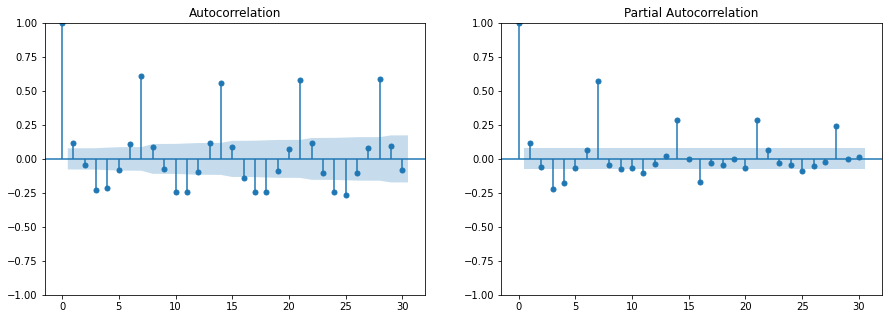

In [13]:
residuals = m1_1.resid # y_trainÍ≥º ÏòàÏ∏°Í∞í Ï∞®Ïù¥
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.07597
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.00115
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


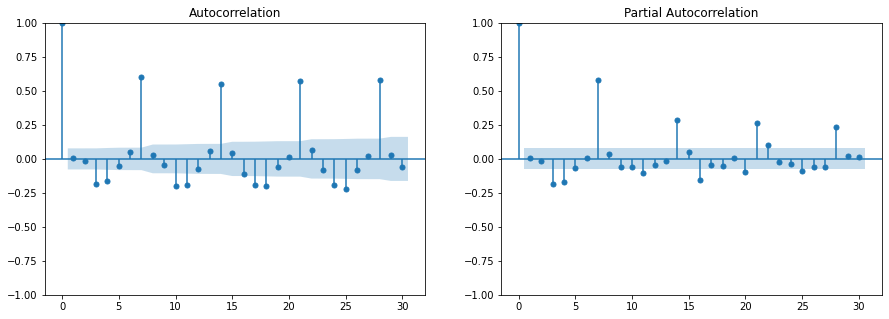

In [14]:
residuals = m1_2.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò
* SARIMAX Î™®Îç∏.aicÎ°ú ÏâΩÍ≤å ÌÜµÍ≥ÑÎüâÏùÑ Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [15]:
print('model1 AIC :', m1_1.aic)
print('model2 AIC :', m1_2.aic)

model1 AIC : 5464.670363958684
model2 AIC : 5442.769868773835


#### ‚ë¢ Validation

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏóê ÎåÄÌï¥ ÎπÑÍµêÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î¥ÖÏãúÎã§.

In [16]:
pred = m1_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 12.918460936648774
MAPE: 0.12228691499862844


In [17]:
pred = m1_2.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 13.123421572374182
MAPE: 0.12539084123404096


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

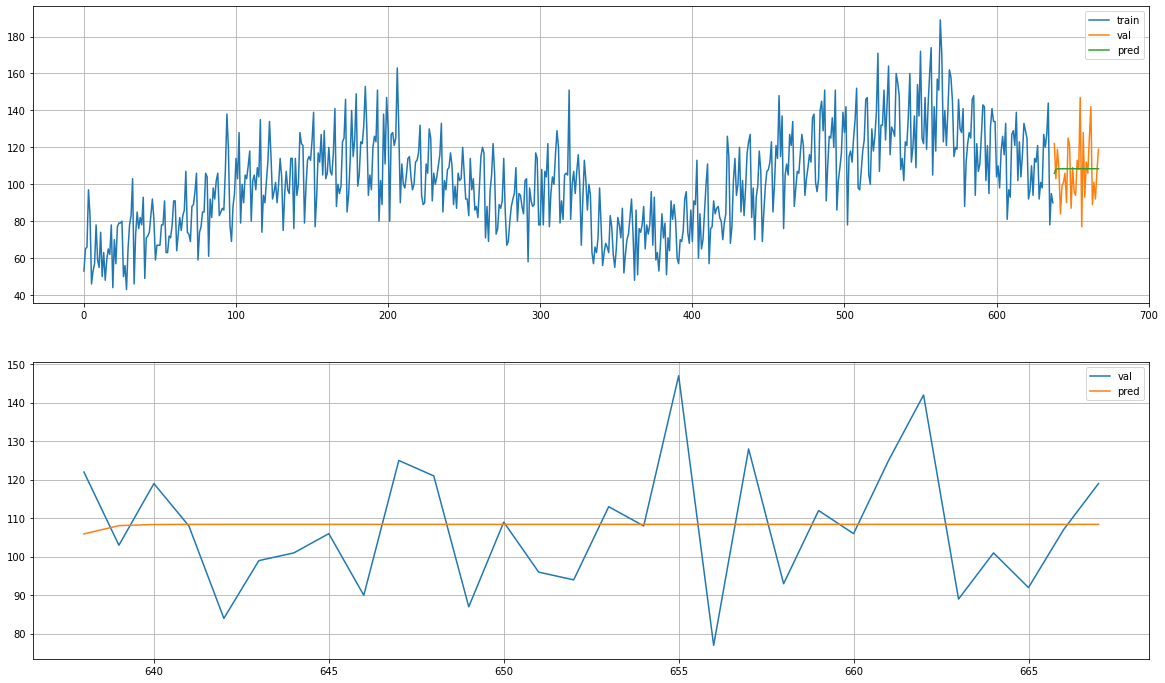

In [18]:
plot_model_result(y_train, y_val, pred)

## (3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

Ïã§Ï†úÎ°ú p, d, qÎ•º Ï∞æÎäî Í≥ºÏ†ïÏùÄ ÎßàÏπò Grid Search Ï≤òÎüº Í∞íÏùÑ Ï°∞Í∏àÏî© Ï°∞Ï†ïÌï¥Í∞ÄÎ©∞  ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ Ï∞æÏïÑÍ∞ÄÎäî Í≥ºÏ†ïÍ≥º Ïú†ÏÇ¨Ìï©ÎãàÎã§.


### 1) ÌïôÏäµ

In [19]:
from itertools import product

* Í∞íÏùò Î≤îÏúÑ ÏßÄÏ†ï

In [20]:
# product Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Í∞íÏùò Ï°∞Ìï©ÏùÑ Íµ¨ÏÑ±
p = [1,2,3,4]
q = [1,2,3,4]
d = [1]
iter = list(product(p,d,q))
iter

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

* ÌäúÎãù

In [21]:
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [22]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])
# Î¶¨Ïä§Ìä∏ ÎÇ¥ ÏµúÎåÄÍ∞í(4)ÏóêÏÑú ÏµúÎåÄ ÏÑ±Îä•Ïù¥ÎØÄÎ°ú Ï∂îÍ∞Ä Î∂ÑÏÑù ÏßÑÌñâÌïòÎ©¥ Ï¢ãÏùå

params(p,d,q)        mae          aic
11     (3, 1, 4)  11.232193  5213.910996

params(p,d,q)        mae          aic
15     (4, 1, 4)  11.650603  5172.030684

In [23]:
m1_3 = sm.tsa.SARIMAX(y_train, order=(4,1,4)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00606
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  3e-05
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


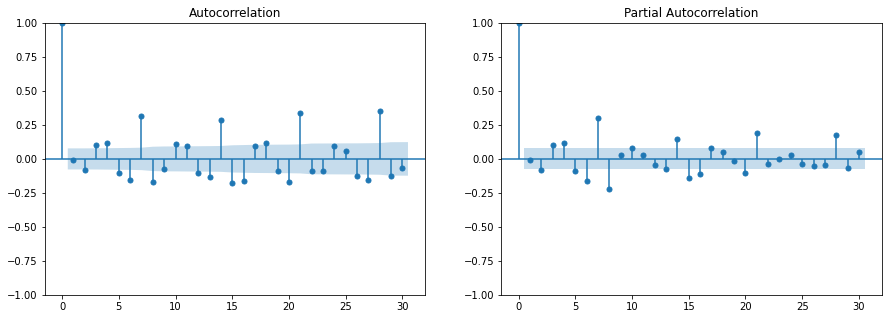

In [24]:
residuals = m1_3.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [25]:
print('model2 AIC :', m1_3.aic)

model2 AIC : 5172.030683620524


#### ‚ë¢ Validation

In [26]:
pred = m1_3.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 11.650603180164243
MAPE: 0.11100775090508731


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

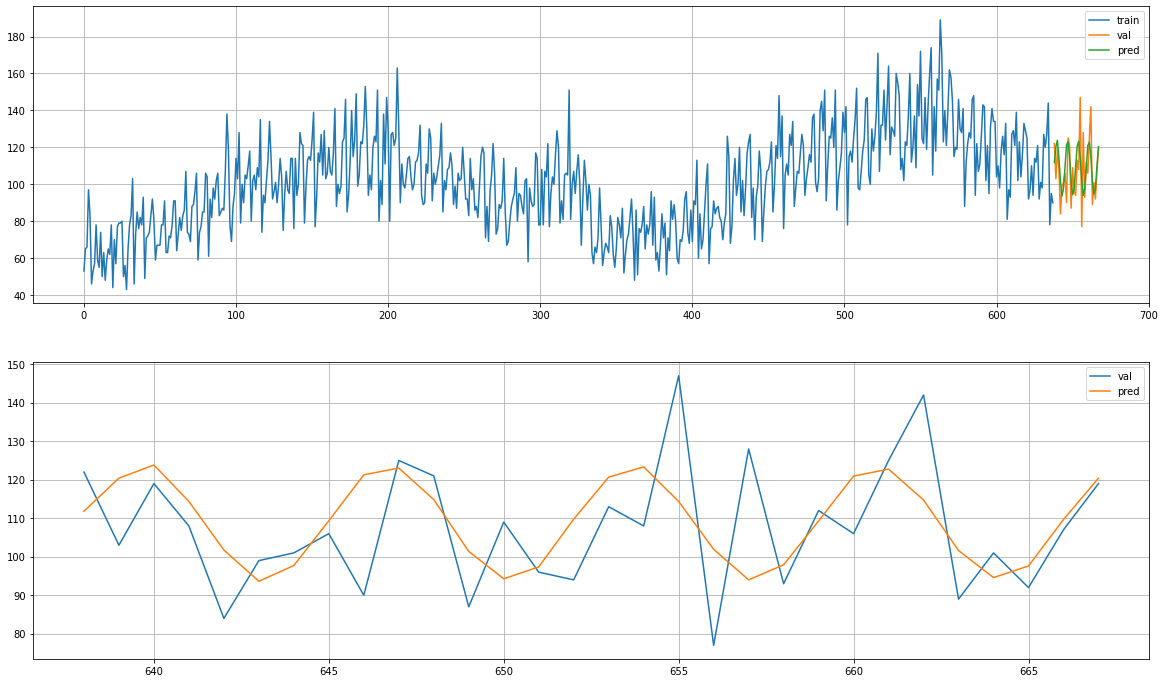

In [27]:
plot_model_result(y_train, y_val, pred)

# 4.Î™®Îç∏ÎßÅ2 : SARIMA

## (1) Î™®Îç∏ÎßÅ : Ï¥àÍ∏∞Î™®Îç∏

### 1) ÌïôÏäµ

In [30]:
# SARIMA Î™®Îç∏ÎßÅ
m2_1 = sm.tsa.SARIMAX(y_train, order=(3,1,3), seasonal_order=(1,1,1,7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00273
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


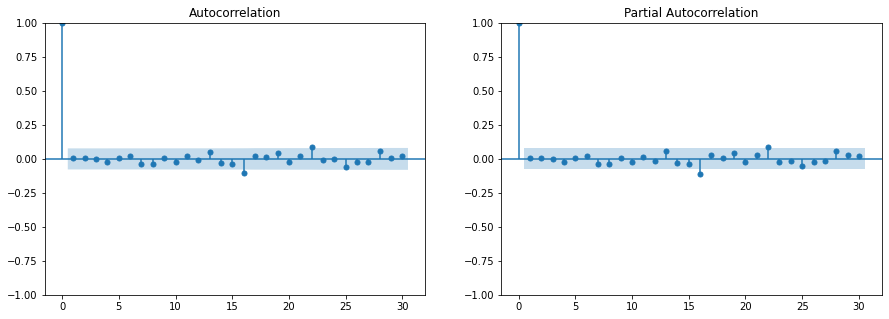

In [31]:
residuals = m2_1.resid
residual_diag(residuals)

#### ‚ë° AIC

In [32]:
print('model2_0 AIC :', m2_1.aic)

model2_0 AIC : 4846.303307653405


#### ‚ë¢ Validation

In [33]:
pred = m2_1.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 7.941225909602522
MAPE: 0.07338637012032881


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

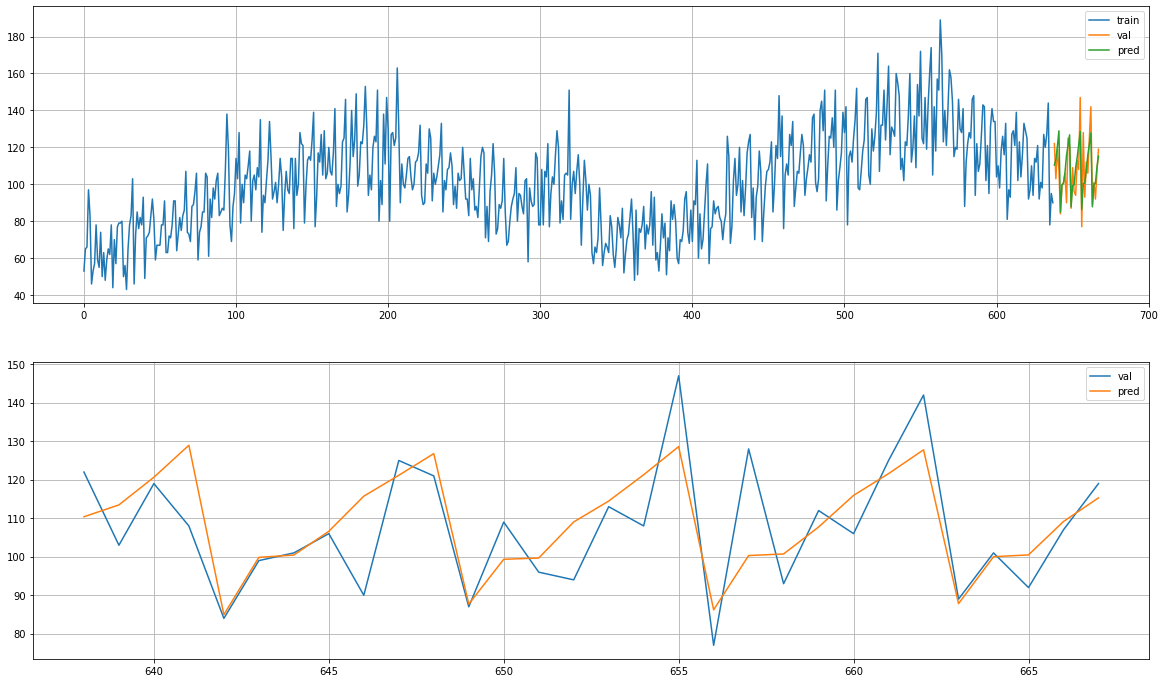

In [34]:
plot_model_result(y_train, y_val, pred)

## (2) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
2~4Î∂Ñ Í±∏Î¶ΩÎãàÎã§. ÎèåÎ†§ ÎÜìÍ≥† Ïâ¨ÎäîÏãúÍ∞Ñ Í∞ñÍ≤†ÏäµÎãàÎã§.

### 1) ÌïôÏäµ

In [35]:
P = [1,2,3]
Q = [1,2,3]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(3,1,3), seasonal_order=(i[0],i[1],i[2],7)).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)


In [36]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

result

params(P,D,Q)       mae          aic
0     (1, 1, 1)  7.941226  4846.303308
1     (1, 1, 2)  8.114314  4848.938458
2     (1, 1, 3)  8.145082  4850.566437
3     (2, 1, 1)  8.153488  4848.678370
4     (2, 1, 2)  8.082205  4850.597971
5     (2, 1, 3)  8.047238  4848.898911
6     (3, 1, 1)  7.936295  4849.689574
7     (3, 1, 2)  8.018076  4852.081371
8     (3, 1, 3)  8.093261  4853.157191

In [37]:
display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

params(P,D,Q)       mae          aic
6     (3, 1, 1)  7.936295  4849.689574

params(P,D,Q)       mae          aic
0     (1, 1, 1)  7.941226  4846.303308

In [39]:
# MAEÏôÄ AIC Í∞Ä Ï†úÏùº ÎÇÆÏùÄ Í∞íÎì§Î°ú Î™®Îç∏ÏùÑ Í∞ÅÍ∞Å ÏÉùÏÑ±Ìï¥ Î¥ÖÏãúÎã§.
m2_2 = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(  3,  1,  1, 7)).fit()
m2_3 = sm.tsa.SARIMAX(y_train, order=(4,1,4), seasonal_order=(  1,  1,  1, 7)).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00127
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


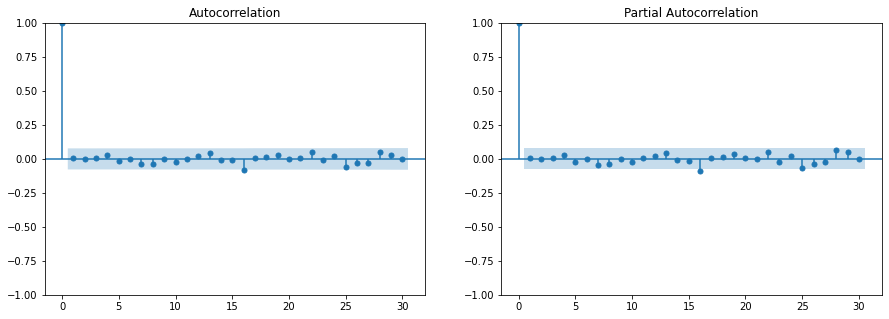

In [40]:
residuals = m2_2.resid
residual_diag(residuals)

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00164
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


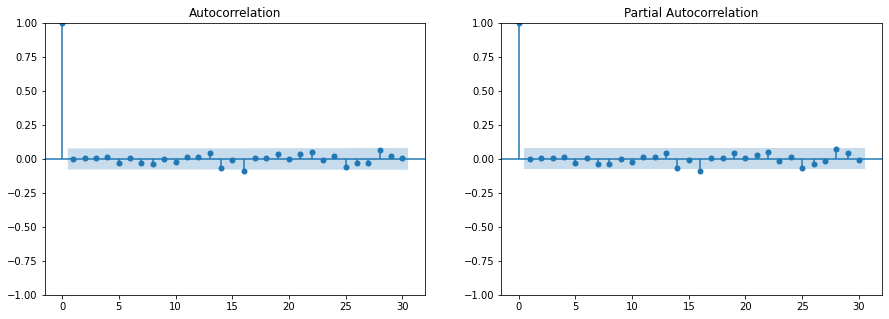

In [41]:
residuals = m2_3.resid
residual_diag(residuals)

#### ‚ë° AIC
* ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑúÏùò Ï†ÅÌï©ÎèÑÏôÄ, featureÍ∞Ä Í≥ºÎèÑÌïòÍ≤å ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌÜµÍ≥ÑÎüâÏù¥ AIC ÏûÖÎãàÎã§.
* Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Ï¢ãÏùÄ Î™®Îç∏
* Í≥µÏãù : ùê¥ùêºùê∂=‚àí2 ln‚Å°(ùêø)+2ùëò ‚û° - Î™®Îç∏Ïùò Ï†ÅÌï©ÎèÑ + Î≥ÄÏàòÏùò Í∞ØÏàò

In [42]:
print('model2_2 AIC :', m2_2.aic)
print('model2_3 AIC :', m2_3.aic)

model2_2 AIC : 4846.2903020254025
model2_3 AIC : 4846.830535290303


#### ‚ë¢ Validation

In [43]:
pred = m2_3.forecast(30)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 8.278177781621103
MAPE: 0.07623626571474132


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

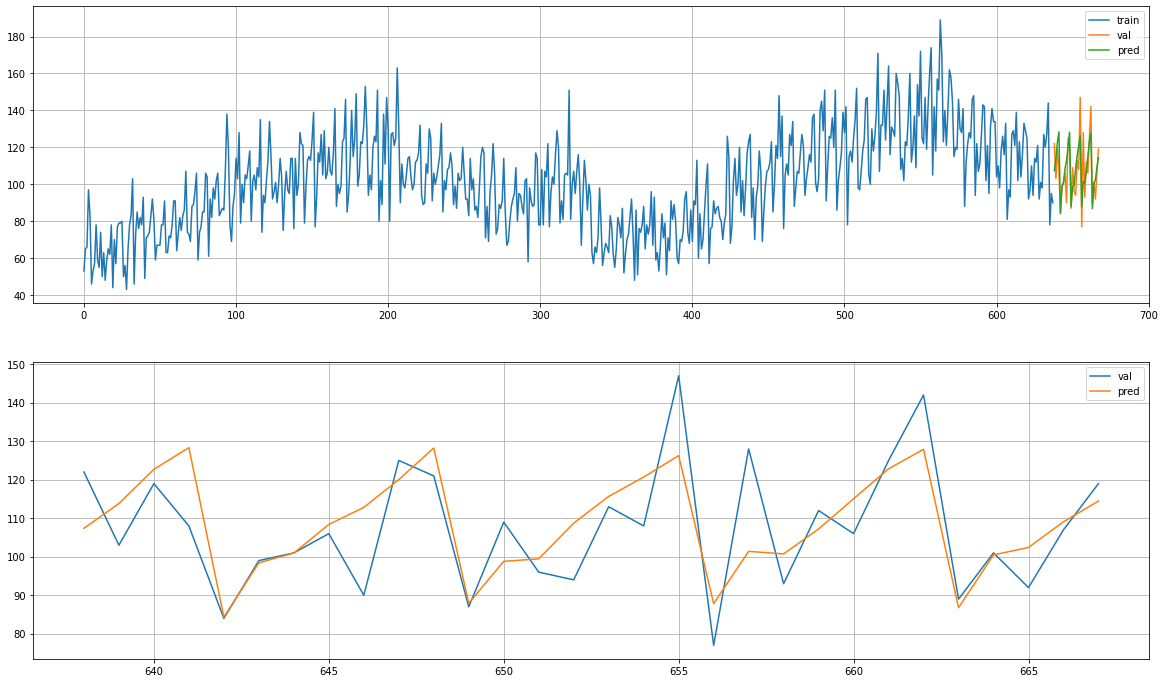

In [44]:
plot_model_result(y_train, y_val, pred)

# 5.Î™®Îç∏ÎßÅ3 : SARIMAX

## (1) Ï†ÑÏ≤òÎ¶¨

In [45]:
# Í∞ÄÎ≥ÄÏàòÌôî
x2 = pd.get_dummies(x, columns = ['weekday'], drop_first=False)

# feature engineering
x2['sales_lag7'] = x2['sales'].shift(6)
x2.head(10)


sales  weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0     45            0            0            0            0            0   
1     53            0            0            0            0            0   
2     65            0            0            0            0            1   
3     66            1            0            0            0            0   
4     97            0            0            1            0            0   
5     83            0            0            0            1            0   
6     46            0            1            0            0            0   
7     53            0            0            0            0            0   
8     57            0            0            0            0            0   
9     78            0            0            0            0            1   

   weekday_Tue  weekday_Wed  sales_lag7  
0            1            0         NaN  
1            0            1         NaN  
2            0            0         NaN  
3            0            0         NaN  
4            0            0         NaN  
5            0            0         NaN  
6            0            0        45.0  
7            1            0        53.0  
8            0            1        65.0  
9            0            0        66.0

In [46]:
x3, y3 = x2[6:].copy(), y[6:].copy()

x3.reset_index(drop = True, inplace = True)
y3.reset_index(drop = True, inplace = True)
x3.head()

sales  weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0     46            0            1            0            0            0   
1     53            0            0            0            0            0   
2     57            0            0            0            0            0   
3     78            0            0            0            0            1   
4     59            1            0            0            0            0   

   weekday_Tue  weekday_Wed  sales_lag7  
0            0            0        45.0  
1            1            0        53.0  
2            0            1        65.0  
3            0            0        66.0  
4            0            0        97.0

In [47]:
x_train, x_val, y_train, y_val = train_test_split(x3, y3, test_size = 30, shuffle = False)

## (1) Î™®Îç∏ÎßÅ

### 1) ÌïôÏäµ
* ÌïôÏäµÌï† Îïå **exog=x_train** ÏòµÏÖòÏù¥ Ìè¨Ìï®ÎêòÏñ¥Ïïº Ìï®.

In [48]:
m3_1 = sm.tsa.SARIMAX(y_train, order=(5,1,2), seasonal_order=(1,1,1,7), exog=x_train).fit()

### 2) ÌèâÍ∞Ä

#### ‚ë† ÏûîÏ∞®ÏßÑÎã®

* residual_diag

* Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï(> 0.05) :  0.00425
* Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï(< 0.05) :  0.0
* ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± ÌôïÏù∏(ACF, PACF)


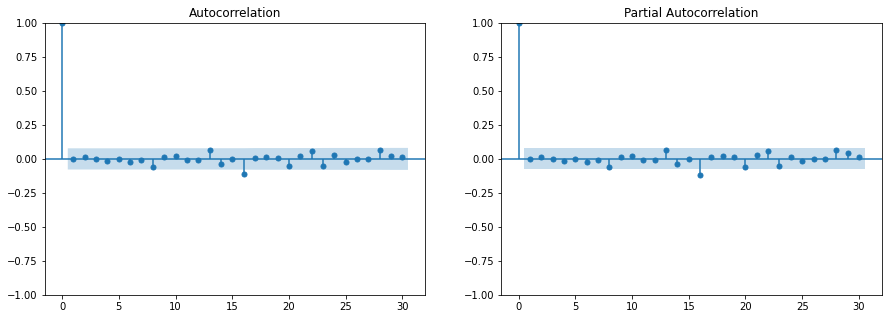

In [49]:
residuals = m3_1.resid
residual_diag(residuals)

#### ‚ë° AIC

In [50]:
print('m3_1 AIC :', m3_1.aic)

m3_1 AIC : 4822.134226455737


#### ‚ë¢ Validation
SARIMAX Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, ÏòàÏ∏°Ìï† ÎïåÎäî **exog=x_val** ÏòµÏÖòÏù¥ Îì§Ïñ¥Í∞ÄÏïº Ìï®.

In [51]:
pred = m3_1.forecast(30,  exog=x_val)
print('MAE :', mean_absolute_error(y_val, pred))
print('MAPE:', mean_absolute_percentage_error(y_val, pred))

MAE : 9.09646406458266
MAPE: 0.0843399673618798


* Í≤∞Í≥º ÏãúÍ∞ÅÌôî

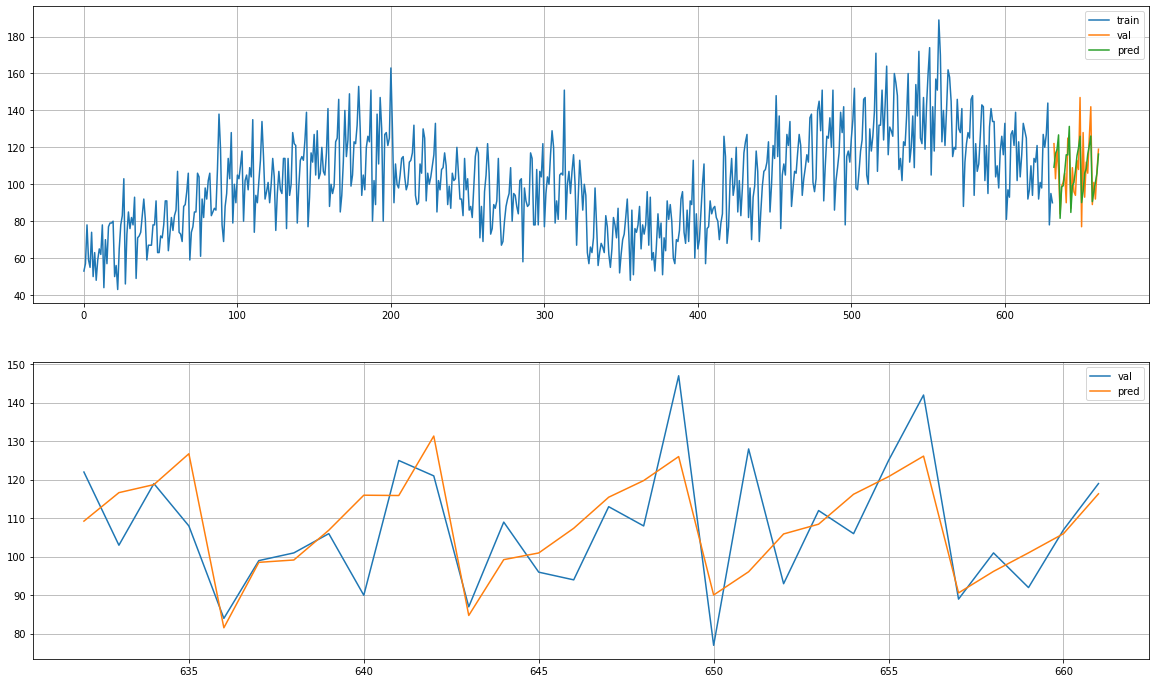

In [52]:
plot_model_result(y_train, y_val, pred)